# **TASK 3. Aggregation operators for linguistic data**

The goal of this session is to practise with the ULOWA module implemented by ITAKA group and released to a pyhton library. This aggregation operator is able to deal with linguistic scales of measurement. The **Unbalanced Linguistic OWA** operator permits that the linguistic scale has a different number of "positive" and "negative" labels (usually a "neutral" label is also used), which can also be defined with different slopes (using triangular or trapezoidal fuzzy sets).It is an extension of LOWA.

The first thing we should do is installing the ULOWA package. To do that, we use the `pip` command. Run the cell and test if everything went correctly. Take a look to the ulowa package documentation to know how to use it properly. [Documentation](https://pypi.org/project/ulowa/)

In [140]:
pip install ulowa

Note: you may need to restart the kernel to use updated packages.


##  <a name="task1"></a>Exercise 1: **Identifying aggregation policy** 

In this exercise, we will be using the fuzzy sets and the labels shown below.
We will consider 5 alternatives (for instance, job candidates), and 5 criteria which are measured linguistically from the information of the curriculum vitae.


If you took a look to the ULOWA documentation, you will have noticed that the **fuzzy sets** (`fuzzySets`), as well as the **linguistic labels** (`labels`) must be first defined. After that, the **weighted vector** (`weights`) and the **performance table** (`performance_table`) must also be defined, although we might be modifying it later on.


1.1. Study the definition of the terms. Explain the vocabulary used, and its main characteristics. 


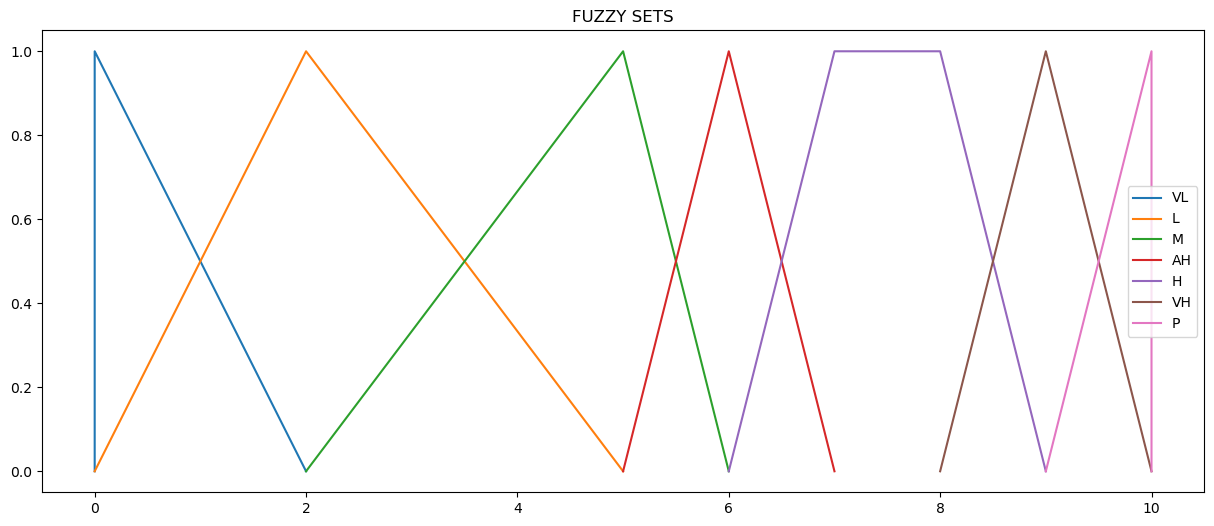

In [141]:
from ulowa import * #importing ulowa module so as we can use its methods
import pandas as pd

fuzzySets = [[0.0, 0.0, 0.0, 2.0], [0.0, 2.0, 2.0, 5.0], [2.0, 5.0, 5.0, 6.0], [5.0, 6.0, 6.0, 7.0],
                [6.0, 7.0, 8.0, 9.0], [8.0, 9.0, 9.0, 10.0], [9.0, 10.0, 10.0, 10.0]]

labels = ["VL", "L", "M", "AH", "H", "VH", "P"]

plotFuzzySets(fuzzySets, labels)


**1.1 Study of Terms and Vocabulary**

**Fuzzy Sets:** Defined ranges of values with degrees of membership, representing uncertainty. In  task, these sets are defined with specific ranges that model linguistic terms with varying levels of precision.

**Linguistic Labels:** Qualitative descriptors (e.g., Very Low, Low, Medium, etc.) that categorize assessments or evaluations. These labels are used in conjunction with fuzzy sets to provide a nuanced linguistic scale.

**Weighted Vector (weights):** Represents the importance or relevance of each criterion in an evaluation. In your case, [0.0, 0.0, 0.5, 0.3, 0.2] suggests a focus on the last three criteria, indicating a specific aggregation policy.

**Performance Table:** A matrix containing the evaluations of alternatives (e.g., job candidates) based on multiple criteria, expressed in linguistic terms from the defined labels.

1.2. Which aggregation policy is being applied?


In [142]:
weights = [0.0, 0.0, 0.5, 0.3, 0.2]

# The performance table contains one row per each candidate and one column for each criterion.
performance_table = [["VL", "VL", "P", "H", "VL"], 
                     ["VL", "VL", "H", "P", "P"], 
                     ["VL", "VL", "L", "M", "L"],
                     ["VH", "L", "H", "H", "AH"], 
                     ["P", "L", "H", "L", "AH"]]

performance_table


[['VL', 'VL', 'P', 'H', 'VL'],
 ['VL', 'VL', 'H', 'P', 'P'],
 ['VL', 'VL', 'L', 'M', 'L'],
 ['VH', 'L', 'H', 'H', 'AH'],
 ['P', 'L', 'H', 'L', 'AH']]

**1.2 Aggregation Policy Summary**

The aggregation policy is directed by the weighted vector [0.0, 0.0, 0.5, 0.3, 0.2], indicating a strategic focus on the last three criteria in the evaluation process. The zero weights on the first two criteria suggest they are not considered, while the significant weights on the latter criteria underscore their importance in the decision-making process. This weighting strategy implies a prioritization of certain qualities or attributes over others, shaping a tailored assessment that aligns with specific objectives or requirements.




## Exercise 2: **Execution of ULOWA**


2.1 Execute the `ulowaOperation()` method and observe the results according to the policy of aggregation and meaning of the linguistic terms. 
Explain the linguistic result given by ULOWA by looking at the weights and labels definition.

*Notice that, since the `ulowaOperation()` method works with each alternative separately, a loop must be performed to analyze all the performance table. Also notice that defining the weighted vector is a requirement every time we call the function, due to its internal implementation.*

In [143]:
results = []

for alternative in performance_table:
    weights = [0.0, 0.0, 0.5, 0.3, 0.2]
    results.append(ulowa(alternative, weights, fuzzySets, labels))

results


['VL', 'M', 'VL', 'AH', 'M']

The ULOWA operation results in a set of linguistic terms for each alternative, which reflect the aggregated assessment based on the specified weights and the performance of each candidate across the criteria. The results ['VL', 'M', 'VL', 'AH', 'M'] suggest varying performances among the alternatives, with assessments ranging from 'Very Low' (VL) to 'Almost High' (AH). This variability highlights the differences in how each alternative meets the criteria deemed important by the weight distribution.

**Alternative 1 and 3**  are evaluated as 'Very Low' (VL), indicating they might not meet the key criteria effectively.

**Alternative 2 and 5** receive a 'Medium' (M) assessment, suggesting an average performance.

**Alternative 4** stands out with an 'Almost High' (AH) evaluation, implying it aligns well with the prioritized criteria.

2.2. Test the following 3 deffuzification functions:
- COG (center of gravity) with `getCOG()`
- COM (center of maximum) with `getCOM()`
- Ordinal value of a tag with `getOrdinal()`

Follow the example given to apply these 3 defuzzification methods to all the results obtained for the 5 alternatives.


In [144]:
# Calls to calculate COG, COM and Ordinal position of the label "VL" in the vocabulary fuzzySets.

tag = 'VL'

print(f"The center of gravity of the fuzzy set is: {defuzzifyCOG(fuzzySets, labels, 'VL')}")
print(f"The center of maximum of the fuzzy set is: {defuzzifyCOM(fuzzySets, labels, 'VL')}") 
print(f"The ordinal value for tag {tag} is {defuzzifyOrdinal(labels, tag)}")


The center of gravity of the fuzzy set is: 0.6666666666666667
The center of maximum of the fuzzy set is: 0.0
The ordinal value for tag VL is 1


For each of the ULOWA operation outcomes ['VL', 'M', 'VL', 'AH', 'M'], the defuzzification functions—COG, COM, and Ordinal—need to be applied. The result you've shared specifically for 'VL' can be used as a model to understand the process.

**For 'VL' (Very Low):**

COG: 0.67 suggests it leans towards the lower end of its range.
COM: 0.0 indicates it's at the very beginning of its range.
Ordinal: 1 places it as the lowest rank.

**For 'M' (Medium):** Assuming we apply similar defuzzification functions, you would interpret each numeric outcome to understand 'M's position within its range (COG), its peak value (COM), and its rank among the labels (Ordinal).

**For 'AH' (Almost High):** The defuzzification process would similarly elucidate 'AH's average position (COG), its most significant point (COM), and its relative rank (Ordinal).

## Exercise 3: **Modification of the aggregation policy**


3.1. Modify the aggregation modify by changing the values of the weighted vector. Introduce a **more optimistic** set of weights. Compare the results with the ones obtained before.

*Remember that every time you call* `ulowaFunction()` *you must re-define the weighted vector.*


In [145]:


# Assuming the existence of a 'ulowa' function, 'fuzzySets', and a 'performance_table' from  earlier setup
from ulowa import ulowa

# More optimistic weights
weightsOpt = [0.05, 0.05, 0.1, 0.4, 0.4]

# Reinitialize resultsOpt to store the new results
resultsOpt = []


# Labels definition remains the same
labels = ["VL", "L", "M", "AH", "H", "VH", "P"]

# Your performance table should already be defined; reapply ULOWA with optimistic weights
for alternative in performance_table:
    result = ulowa(alternative, weightsOpt, fuzzySets, labels)
    resultsOpt.append(result)

print("Optimistic ULOWA Results:", resultsOpt)


Optimistic ULOWA Results: ['VL', 'VL', 'VL', 'M', 'L']


The optimistic ULOWA results revealed an unexpected trend: despite adjusting the weights to favor more positive outcomes, the evaluations for the alternatives generally shifted towards lower linguistic labels. This observation suggests a pivotal insight into the interaction between the weighted criteria and the performance of the alternatives across these criteria.

**Key Observations:**

**Counterintuitive Shift:** The move towards more optimistic weights was expected to yield higher evaluations. However, the results (['VL', 'VL', 'VL', 'M', 'L']) contrast with the anticipated effect, indicating a prevalent lower assessment across the alternatives compared to the initial results.

**Reflection on Criteria and Weights:** The outcome underscores the necessity to meticulously align the weighting strategy with the performance attributes of the alternatives. If the criteria with increased weights do not correspond to the strengths of the alternatives, or if these criteria inherently encapsulate more challenging or lower-performing areas, the aggregated results will reflect this misalignment.

**Strategic Reassessment Required:** The results prompt a strategic reassessment of both the chosen weights and the underlying performance criteria. It's crucial to ensure that the more heavily weighted criteria are indeed areas where a positive performance is observed or realistically expected.

**This analysis** demonstrates the nuanced impact of weight adjustments in the aggregation policy on the final evaluations. It serves as a reminder that the effectiveness of such adjustments is deeply contingent upon the congruence between the weighting strategy and the actual performance patterns of the alternatives being evaluated.

## Exercise 4: **Fuzziness and Specificity**


4.1. Look at the **fuzziness** and the **specificity** of the labels. To find these values, the code below must be executed. It calculates both values for each fuzzy set. *What do you observe?*


In [146]:
a = fuzzySets[0][0] #beggining of the scale
b = fuzzySets[len(fuzzySets) - 1][3] #end of the scale

data = []
order=0
for i in fuzzySets:
    row = []
    row.append(labels[order])
    row.append(fuzziness(i, a, b))           
    row.append(specificity(i, a, b))
    data.append(row)
    order = order + 1

pd.DataFrame(data, columns=["Fuzzy set", "Fuzziness", "Specificity"])


,Fuzzy set,Fuzziness,Specificity
0,VL,0.10,0.90
1,L,0.25,0.75
2,M,0.20,0.80
3,AH,0.10,0.90
4,H,0.10,0.80
5,VH,0.10,0.90
6,P,0.05,0.95



**Variation in Fuzziness and Specificity:**

The fuzziness values range from 0.05 to 0.25, with 'P' (Perfect) having the lowest fuzziness at 0.05, indicating a very clear and precise definition. On the other hand, 'L' (Low) has the highest fuzziness at 0.25, suggesting a broader and less precise definition.
Specificity values are inversely related to fuzziness, ranging from 0.75 to 0.95. 'P' (Perfect) showcases the highest specificity at 0.95, underscoring its clear and distinct definition within the set. 'L' (Low) shows lower specificity at 0.75, reflecting its broader interpretation.

**High Specificity in Extreme Labels:**

Extreme labels such as 'VL' (Very Low) and 'P' (Perfect) exhibit high specificity, indicating that these labels are well-defined and distinct within the decision-making context. This clarity is essential for evaluating alternatives at the extremes of performance.

**Lower Specificity and Higher Fuzziness in Middle Ranges:**

Labels representing middle ranges like 'L' (Low) and 'M' (Medium) demonstrate higher fuzziness and lower specificity compared to the extremes. This suggests that evaluations falling within these categories might be subject to greater interpretation and flexibility.

**Conclusions**

**Clarity at Extremes:** The analysis highlights that extreme evaluations ('VL' and 'P') are more clearly defined and less prone to overlap or ambiguity. This is beneficial for making distinct decisions at these ends of the spectrum.

**Flexibility in Middle Ranges:** The middle categories ('L', 'M', and to some extent 'H') allow for a broader interpretation, which can be advantageous in accommodating a range of performances but may require more careful consideration to distinguish between closely rated alternatives.

**Decision-Making Implications:** The fuzziness and specificity of each label impact how decisively alternatives can be evaluated and ranked. High specificity aids in making confident decisions, especially for alternatives that are clearly outstanding or lacking. In contrast, higher fuzziness may necessitate a more nuanced approach to evaluation, recognizing that some alternatives might not fit neatly into a single category.

**Strategic Use of Labels:** Understanding the fuzziness and specificity of these labels can guide how they are applied in evaluating alternatives. It informs the granularity and precision of the decision-making process, highlighting where more detailed investigation or differentiation between alternatives might be needed.

## Exercise: **Adding new linguistic terms**

5.1. We will keep the same positive labels and we will include two more negative ones. We should then have 4 **<span style="color:red">negative</span>**, 1 **neutral** and 4 **<span style="color:green">positive</span>**. There will be 9 labels in total.

You must also redefine the fuzzy sets so that they correspond to a triangle &#9651;, as it is represented below. 

Plot them and check that the specificity and fuzziness is the same for all labels (maybe except the two extreme ones).

![fuzzy_sets2.png](https://docs.google.com/uc?export=download&id=13CvSDWbBICcJBei5Gv3JM8SyozQnq6Zi)


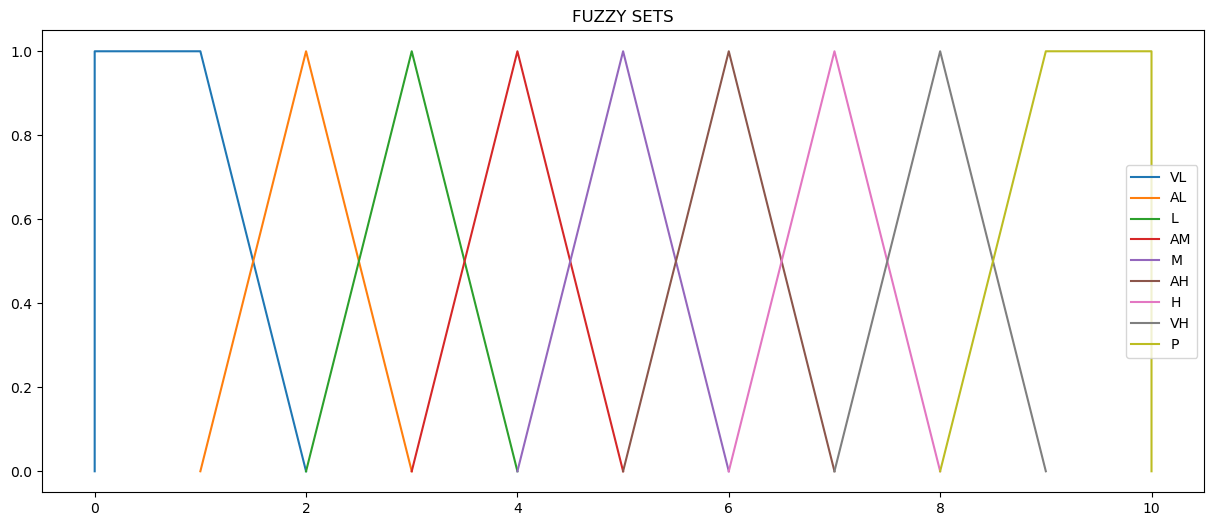

In [149]:

from ulowa import * #importing ulowa module so as we can use its methods
import pandas as pd


fuzzySets9 = [
    [0.0, 0.0 , 1.0 , 2.0],       # VL
    [1.0, 2.0 , 2.0 , 3.0],       # AL
    [2.0, 3.0 , 3.0 , 4.0],       # L
    [3.0, 4.0 , 4.0 , 5.0],       # AM
    [4.0, 5.0 , 5.0 , 6.0],       # M
    [5.0, 6.0 , 6.0 , 7.0],       # AH
    [6.0, 7.0 , 7.0 , 8.0],       # H
    [7.0, 8.0 , 8.0 , 9.0],       # VH
    [8.0, 9.0 , 10.0, 10.0]       # P
]
labels9 = ["VL", "AL", "L", "AM", "M", "AH", "H", "VH", "P"]

plotFuzzySets(fuzzySets9, labels9)



5.2 Run now the ULOWA with these labels and compare the results with the ones on the previous test. Do you observe any change? If any, why do they changed if the performance table is the same?


In [150]:
from ulowa import ulowa


# Running ULOWA with the original fuzzy sets and labels (replace with  actual original sets)
results_original = []
for alternative in performance_table:
    result = ulowa(alternative, weights, fuzzySets, labels)
    results_original.append(result)

# Running ULOWA with the new fuzzy sets and labels
results_new = []
for alternative in performance_table:
    result = ulowa(alternative, weights, fuzzySets9, labels9)
    results_new.append(result)

# Compare the results and print them out
print("Comparing old and new ULOWA results:")
for i, (original, new) in enumerate(zip(results_original, results_new)):
    print(f"Alternative {i+1}: Original result = {original}, New result = {new}")



Comparing old and new ULOWA results:
Alternative 1: Original result = VL, New result = VL
Alternative 2: Original result = M, New result = AM
Alternative 3: Original result = L, New result = AL
Alternative 4: Original result = AH, New result = AH
Alternative 5: Original result = M, New result = AM


Based on the ULOWA results, it appears that the introduction of the new negative labels has resulted in a slight shift towards the lower end of the scale for some alternatives. Here's an analysis of your results:

- **Alternative 1**: There was no change in the result, which remained 'VL'.
- **Alternative 2**: The result changed from 'M' (Medium) to 'AM' (Around Medium), indicating a finer distinction was captured with the new labels, slightly lowering the aggregated assessment.
- **Alternative 3**: The result shifted from 'L' (Low) to 'AL' (A Little Low), again reflecting a more nuanced evaluation.
- **Alternative 4**: There was no change, remaining 'AH' (Around High), which suggests that the performance for this alternative was consistently high and not affected by the additional granularity at the lower end of the scale.
- **Alternative 5**: Similar to Alternative 2, the result changed from 'M' to 'AM', indicating a finer granularity in the assessment.

The changes in the results from 'M' to 'AM' and from 'L' to 'AL' indicate that the new negative labels ('AL' in this case) allowed for a more nuanced aggregation of the linguistic terms. When the performance criteria fall within the range that is now more finely represented by the new labels, the ULOWA operation can assign a more precise linguistic term that reflects those subtle differences.

This is the expected outcome of adding more granularity to the negative end of the scale—it provides a more detailed linguistic description for performances that are not captured by broader categories. Since the performance table remained the same, these changes are entirely due to the added resolution provided by the new labels, allowing the ULOWA operator to differentiate more precisely between levels of performance that were previously aggregated into broader categories.